In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
death_url =  "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
deaths_df = pd.read_csv(death_url, error_bad_lines=False)

cases_url =  "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
cases_df = pd.read_csv(cases_url, error_bad_lines=False)

states_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-08-2020.csv"
states_df = pd.read_csv(states_url, error_bad_lines=False)

# county_level = "https://raw.githubusercontent.com/Yu-Group/covid19-severity-prediction/master/data/county_data_abridged.csv"
county_df = pd.read_csv('./covid19/small_abridged.csv', error_bad_lines=False)

In [82]:
deaths_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,92,94,95,97,97,99,99,102,107,108
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,4,4,4,4,4,4,4,4,4,4


In [106]:
#drop territories
cases = cases_df[~cases_df['Admin2'].isnull()] 
#drop those without FIPS-we thought this is acceptable because most are not actually counties, and there's only 10 of them
cases = cases[~cases['FIPS'].isnull()] 
#change FIPS to integer type
cases['FIPS'] = cases['FIPS'].astype(int)
#Only dealing with states, so county is better name
cases = cases.rename(columns={'Admin2':'County'}) 
#the country is US, unnecessary
cases = cases.drop(columns=['Country_Region'])
cases.head()

#repeat for deaths

#drop territories
deaths = deaths_df[~deaths_df['Admin2'].isnull()] 
#drop those without FIPS-we thought this is acceptable because most are not actually counties, and there's only 10 of them
deaths = deaths[~deaths['FIPS'].isnull()] 
#change FIPS to integer type
deaths['FIPS'] = deaths['FIPS'].astype(int)
#Only dealing with states, so county is better name
deaths = deaths.rename(columns={'Admin2':'County'})
deaths.head()

county = county_df.rename(columns={'countyFIPS':'FIPS', 'CountyName':'County'}).drop(columns=['Unnamed: 0'])
# drop rows that are not counties. There's only two: NYC and Kansas City, so shouldn't matter much
county = county[county['FIPS'].str.isnumeric()]
county['FIPS'] = county['FIPS'].astype(int)
county.head()

county_cases_deaths = pd.read_csv('county_info_cases_deaths.csv')
county_cases_deaths.head()


,Unnamed: 0,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,...,4/30/20_cases,5/1/20_cases,5/2/20_cases,5/3/20_cases,5/4/20_cases,5/5/20_cases,5/6/20_cases,5/7/20_cases,5/8/20_cases,5/9/20_cases
0,0,1001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,...,44,42,45,48,53,53,58,61,67,68
1,1,1003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,...,174,175,181,187,188,189,196,205,208,216
2,2,1005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,...,39,42,43,45,45,47,47,51,53,58
3,3,1007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,...,42,42,42,43,42,43,43,44,44,45
4,4,1009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,...,37,39,40,40,40,40,42,44,44,44


In [103]:
california_counties = county[county['State'] == 'California']

#merge county data with cases
california_cases = cases[cases['Province_State'] == 'California']
california_cases = california_counties.merge(california_cases, right_on='FIPS', left_on='FIPS', how='right', validate='one_to_many')

#merge county data with deaths
california_deaths = deaths[deaths['Province_State'] == 'California']
california_deaths = california_counties.merge(california_deaths, right_on='FIPS', left_on='FIPS', how='right', validate='one_to_many')

california_cases.head()

,FIPS,STATEFP,COUNTYFP,County_x,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,6001,6.0,1.0,Alameda,CA,California,37.646537,-121.849494,37.705201,-122.100393,...,1603,1636,1706,1749,1776,1809,1863,1917,1961,2023
1,6003,6.0,3.0,Alpine,CA,California,38.595405,-119.817665,38.728298,-119.847603,...,2,2,2,2,2,2,2,2,2,2
2,6005,6.0,5.0,Amador,CA,California,38.452565,-120.640865,38.394208,-120.775729,...,8,8,8,8,8,8,8,8,8,8
3,6007,6.0,7.0,Butte,CA,California,39.667234,-121.600771,39.669037,-121.707635,...,16,16,16,16,17,17,18,18,18,18
4,6009,6.0,9.0,Calaveras,CA,California,38.209207,-120.553016,38.163627,-120.633718,...,13,13,13,13,13,13,13,13,13,13


In [108]:
california_cases.columns.values

array(['FIPS', 'STATEFP', 'COUNTYFP', 'County_x', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014',
       '#FTEHospitalTotal2017', "TotalM.D.'s,TotNon-FedandFed2017",
       '#HospParticipatinginNetwork2017', '#Hospitals', '#ICU_beds',
       'dem_to_rep_ratio', 'PopMale<52010', 'PopFmle<52010',
       'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'Po

In [150]:
numerics = california_cases.select_dtypes(include=[np.number])
numerics[numerics.columns[:-109]]

,FIPS,STATEFP,COUNTYFP,lat,lon,POP_LATITUDE,POP_LONGITUDE,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,...,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Drive Alone to Work,% Long Commute - Drives Alone,UID,code3,Lat,Long_
0,6001,6.0,1.0,37.646537,-121.849494,37.705201,-122.100393,1.0,1666753.0,817903.0,...,628.781962,42.021286,10.4,0.0,61.489237,46.4,84006001,840,37.646294,-121.892927
1,6003,6.0,3.0,38.595405,-119.817665,38.728298,-119.847603,8.0,1101.0,610.0,...,442.477876,217.470098,5.6,0.0,66.011236,35.3,84006003,840,38.596786,-119.822359
2,6005,6.0,5.0,38.452565,-120.640865,38.394208,-120.775729,6.0,39383.0,20839.0,...,237.070738,97.813731,8.9,0.0,80.634378,41.4,84006005,840,38.445831,-120.656960
3,6007,6.0,7.0,39.667234,-121.600771,39.669037,-121.707635,3.0,231256.0,113398.0,...,327.057309,98.235283,8.9,1.0,75.287737,24.1,84006007,840,39.667278,-121.600525
4,6009,6.0,9.0,38.209207,-120.553016,38.163627,-120.633718,6.0,45602.0,22754.0,...,327.245738,94.734279,9.0,0.0,75.588288,60.4,84006009,840,38.205371,-120.552913
5,6011,6.0,11.0,39.182700,-122.241495,39.156148,-122.085557,6.0,21627.0,11156.0,...,200.958056,76.908109,8.7,1.0,76.954164,32.6,84006011,840,39.178820,-122.233173
6,6013,6.0,13.0,37.918611,-121.916679,37.935588,-122.030131,1.0,1150215.0,560863.0,...,336.027791,45.954189,11.6,1.0,67.597633,51.0,84006013,840,37.919235,-121.928953
7,6015,6.0,15.0,41.760269,-123.903650,41.791232,-124.163088,7.0,27828.0,14784.0,...,609.109201,103.420148,8.5,0.0,73.778617,10.0,84006015,840,41.742283,-123.897406
8,6017,6.0,17.0,38.780757,-120.528545,38.746543,-120.744330,1.0,190678.0,94342.0,...,217.583946,73.003734,9.3,0.0,76.713355,39.4,84006017,840,38.779660,-120.523317
9,6019,6.0,19.0,36.753678,-119.641036,36.738918,-119.767884,2.0,994400.0,493547.0,...,541.779216,60.924822,15.3,1.0,78.464636,23.7,84006019,840,36.757339,-119.646695


In [181]:
print('Correlation with cases on 5/8')
print(sorted([x for x in corr if x[1] <= 1 and x[1] >= -1], key=lambda x:abs(x[1]), reverse=True)[:10])
print('\nLog Correlation with cases on 5/8')
print(sorted([x for x in log_normal_corr if x[1] <= 1 and x[1] >= -1], key=lambda x:abs(x[1]), reverse=True)[:10])
print('\nLog Correlation with Log cases on 5/8')
print(sorted([x for x in log_log_corr if x[1] <= 1 and x[1] >= -1], key=lambda x:abs(x[1]), reverse=True)[:10])
print('\nCorrelation with Log cases on 5/8')
print(sorted([x for x in normal_log_corr if x[1] <= 1 and x[1] >= -1], key=lambda x:abs(x[1]), reverse=True)[:10])


Correlation with cases on 5/8
[('mortality2015-17Estimated', 0.9800428375621609), ('Poverty Num All Ages 2018', 0.9678564768302951), ('#Hospitals', 0.9648467114187256), ('3-YrDiabetes2015-17', 0.9646732891660836), ('PopFmle30-342010', 0.9642643773043491), ('PopMale30-342010', 0.9635755056836327), ('3-YrMortalityAge35-44Years2015-17', 0.9627301345520928), ('PopFmle25-292010', 0.9625520214607463), ('PopFmle20-242010', 0.9619522298297972), ('PopMale35-442010', 0.9615107532262964)]

Log Correlation with cases on 5/8
[('HPSAServedPop', 0.8972829399620849), ('HPSAServedPop.1', 0.8972829399620849), ('3-YrMortalityAge1-4Years2015-17', 0.8262340829198433), ('mortality2015-17Estimated', 0.822917152390125), ('3-YrMortalityAge5-14Years2015-17', 0.7854663655644921), ('3-YrMortalityAge<1Year2015-17', 0.6222951281570825), ('3-YrMortalityAge15-24Years2015-17', 0.6107841380779705), ('3-YrMortalityAge25-34Years2015-17', 0.5970677161030817), ('3-YrMortalityAge35-44Years2015-17', 0.5803664000911762), ('3-

In [168]:
# find the correlations
numerics = california_cases.select_dtypes(include=[np.number])
corr = []
log_normal_corr = []
log_log_corr = []
normal_log_corr = []
cases = california_cases['5/8/20']
cases_logged = np.log(california_cases['5/8/20'])
for col in numerics.columns.values[:-109]: #rid the other dates
    column = california_cases[col]
    corr.append((col, column.corr(cases)))
    log_normal_corr.append((col, np.log(column).corr(cases)))
    log_log_corr.append((col, np.log(column).corr(np.log(cases))))
    normal_log_corr.append((col, column.corr(np.log(cases))))


/home/victor/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/victor/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


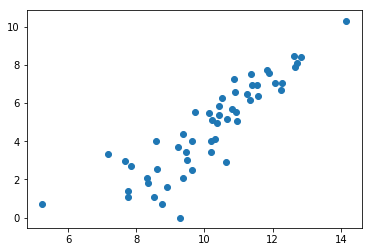

In [175]:
plt.scatter(np.log(california_cases['Poverty Num All Ages 2018']),
           np.log(california_cases['5/8/20']))

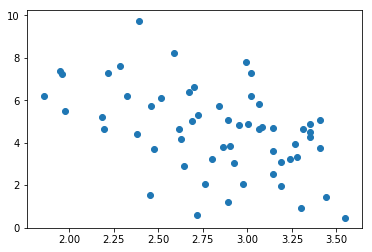

In [171]:
plt.scatter(np.log(california_cases['% Children in Poverty']),
           np.log(california_cases['PopulationDensityperSqMile2010']))

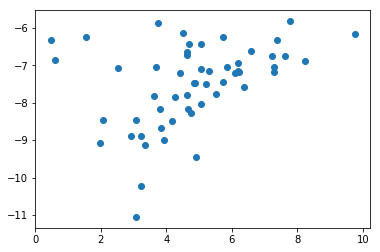

In [121]:
plt.scatter(np.log(california_cases['PopulationDensityperSqMile2010']), np.log(california_cases['5/8/20']/california_cases['PopulationEstimate2018']))


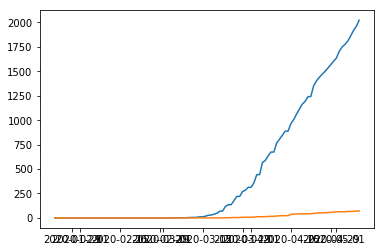

In [105]:
cases.columns.values
dates = cases.columns[11:]
x=pd.to_datetime(dates).values
y=cases[cases['County'] == 'Alameda'][dates].iloc[0].values
sns.lineplot(x=x, y=y)
y=deaths[deaths['County'] == 'Alameda'][dates].iloc[0].values
sns.lineplot(x=x, y=y)